In [1]:
# install & load required packages
devtools::install_github("clairbarnes/rwwa")
suppressMessages(library(rwwa))


── R CMD build ─────────────────────────────────────────────────────────────────
✔  checking for file ‘/tmp/RtmpJWxk7w/remotes1ddfb70878cb1/clairbarnes-rwwa-533d8a6/DESCRIPTION’
─  preparing ‘rwwa’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘rwwa_0.1.1.tar.gz’
   


# Stationary model fitting

In [2]:
# load covariate data
gmst <- read.table("ts/gmst.dat", col.names = c("year", "gmst"))
gmst$gmst <- gmst$gmst - gmst$gmst[gmst$year == 2023]

nino <- read.csv("ts/nino_6monthly.csv", col.names = c("year", "nino"))

# load time series of interest
ts <- read.csv("ts/cx_spei6_ms.csv")

# combine into single dataframe
df <- merge(merge(gmst, nino), ts)

df$elnino <- df$nino
df$elnino[df$elnino < 0] <- 0

In [3]:
mdl_const <- fit_ns("norm", "shift", df, "spei", covnm = NA, lower = T)
mdl_gmst <- fit_ns("norm", "shift", df, "spei", covnm = "gmst", lower = T)
mdl_enso <- fit_ns("norm", "shift", df, "spei", covnm = c("gmst", "nino"), lower = T)
mdl_nino <- fit_ns("norm", "shift", df, "spei", covnm = c("gmst", "elnino"), lower = T)

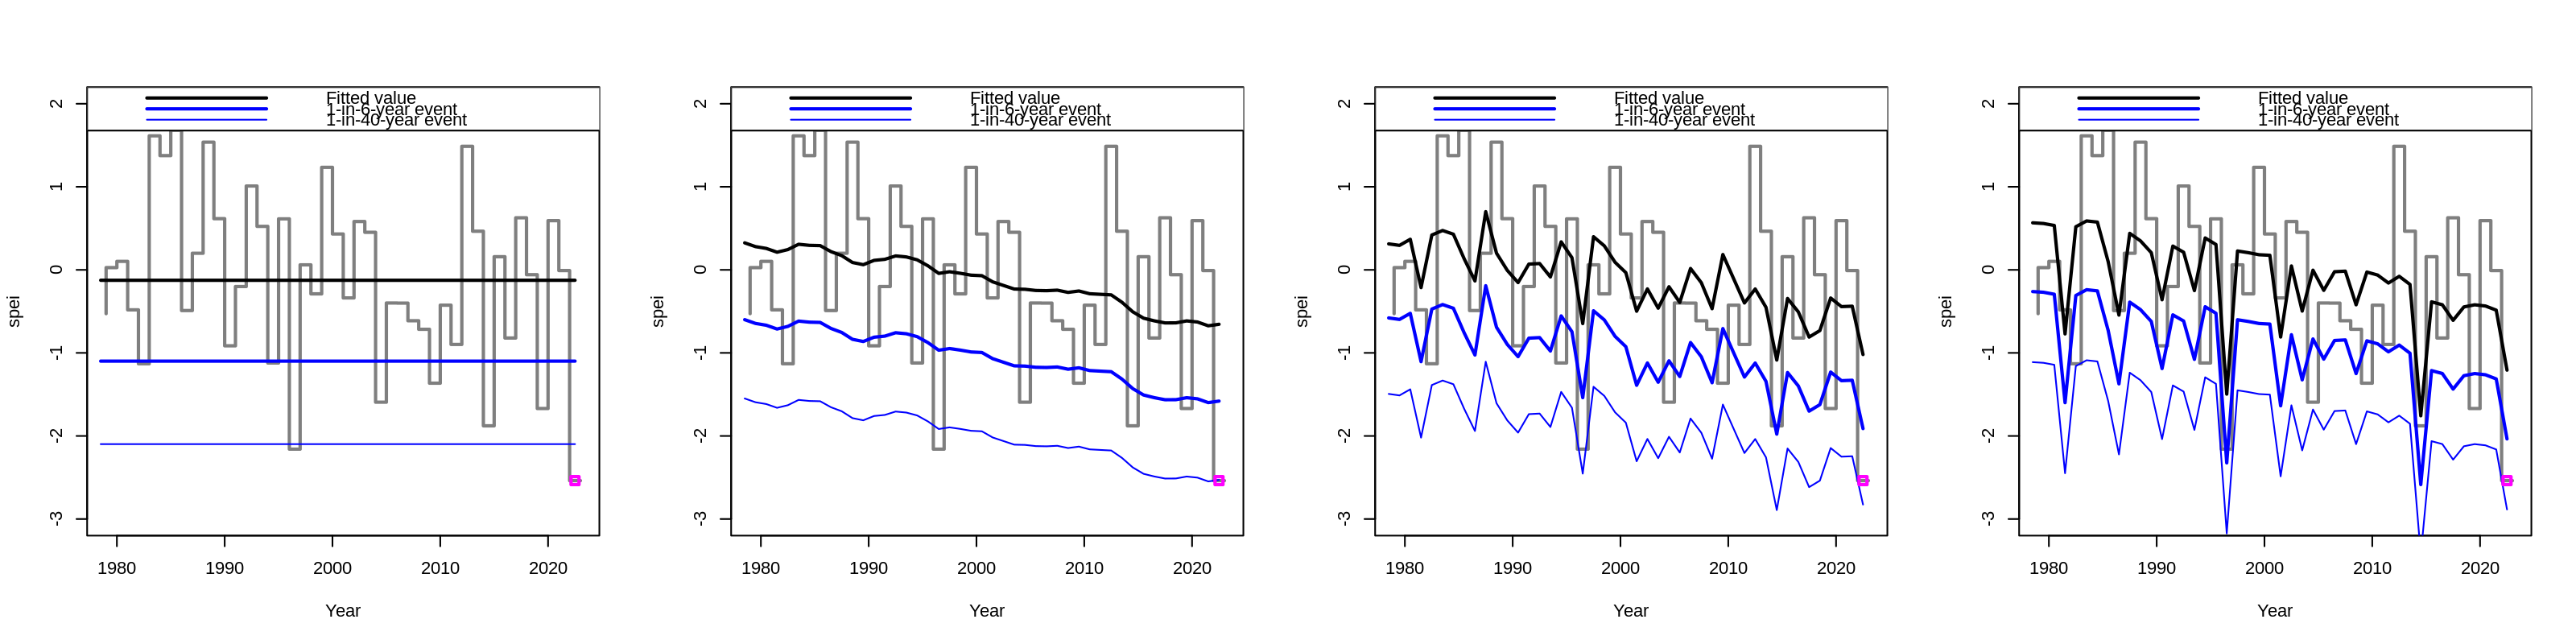

In [4]:
prep_window(c(1,4))

plot_trend(mdl_const)
plot_trend(mdl_gmst)
plot_trend(mdl_enso)
plot_trend(mdl_nino)

In [5]:
rbind("aic" = sapply(c("const", "gmst", "enso", "nino"), function(mnm) aic(get(paste0("mdl_",mnm)))),
      "rsquared" = sapply(c("const", "gmst", "enso", "nino"), function(mnm) rsquared(get(paste0("mdl_",mnm)))))

,const,gmst,enso,nino
aic,134.28712714,129.65735180,128.3698368,121.7028101
r2,0.00000000,0.09776828,0.1613315,0.2768191
r2.adj,-0.02325581,0.07678615,0.1213949,0.2423820
